## Concrete Cracking Data Analysis
This colab analyzes the processed data from a finite element model (FEM) with corrosion pattern inputs. The inputs to this colab are the processed .npy files after running data generation and data preprocessing.

Data generation code: https://github.com/jmswong/concrete_corrosion/tree/main/data_generation

Data preprocessing code: https://github.com/jmswong/concrete_corrosion/tree/main/data_preprocessing

# Contents
- Example Corrosion Patterns
- Peak Corrosion Depths
- Concrete Property Distributions

In [3]:
# Imports
import copy
import random
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive

In [4]:
# mount drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# load processed dataset
corrosion_data = np.load('/content/drive/MyDrive/CS230/corrosion_train.npy', allow_pickle=True)
target_data = np.load('/content/drive/MyDrive/CS230/labels_train.npy', allow_pickle=False)
print("corrosion_data shape: ", corrosion_data.shape)
print("target_data shape: ", target_data.shape)

corrosion_data shape:  (1585, 343)
target_data shape:  (1585,)


# Summary Statistics

In [6]:
# Number of positive vs. negative samples
NUM_TOTAL = len(target_data)
NUM_POSITIVE = sum(target_data)
NUM_NEGATIVE = NUM_TOTAL - NUM_POSITIVE
print("Number of positive (cracked) samples: %d (%.2f%%)" % \
      (NUM_POSITIVE, 100 * NUM_POSITIVE / NUM_TOTAL))
print("Number of negative (not cracked) samples: %d (%.2f%%)" % \
      (NUM_NEGATIVE, 100 * NUM_NEGATIVE / NUM_TOTAL))

Number of positive (cracked) samples: 592 (37.35%)
Number of negative (not cracked) samples: 993 (62.65%)


# Example corrosion patterns

In [7]:
corrosion_data_positive = corrosion_data[target_data==1]
corrosion_data_negative = corrosion_data[target_data==0]

[Text(0, 0.5, 'corrosion depth')]

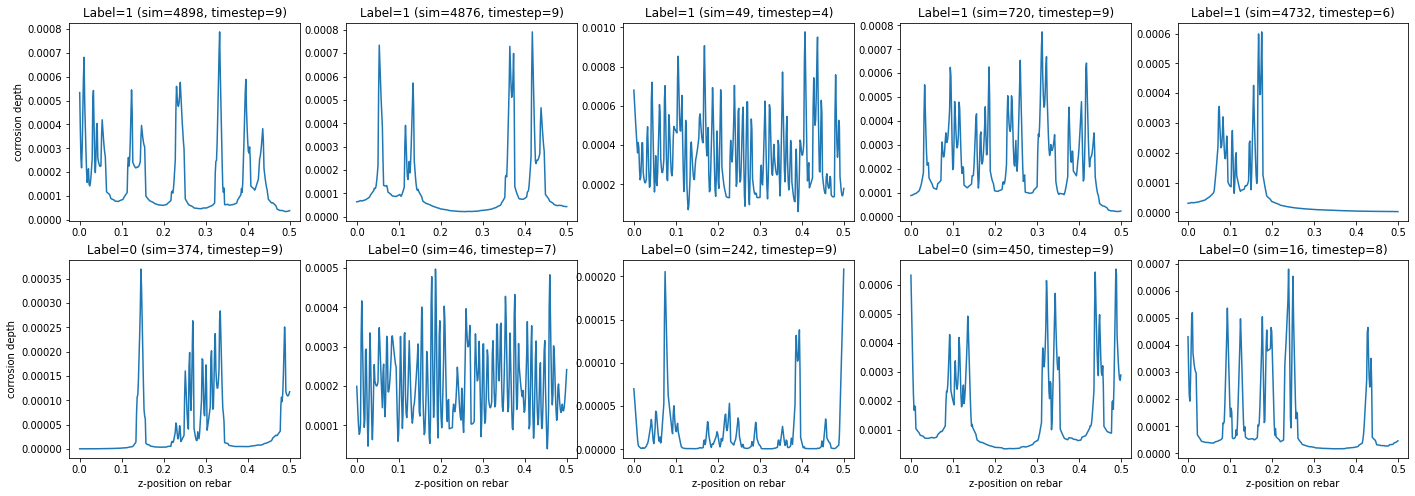

In [8]:
NUM_EXAMPLES = 5 # Number of examples to show
OFFSET = 140 # Change offset to see different examples
fig, axs = plt.subplots(2, NUM_EXAMPLES, figsize=(24,8))

for i in range(NUM_EXAMPLES):
  pos_sample = corrosion_data_positive[i+OFFSET]
  axs[0][i].plot(np.linspace(0, 0.5, 337), pos_sample[6:])
  axs[0][i].set_title("Label=1 (sim=%d, timestep=%d)" % (pos_sample[0], pos_sample[1]))

  neg_sample = corrosion_data_negative[i+OFFSET]
  axs[1][i].plot(np.linspace(0, 0.5, 337), neg_sample[6:])
  axs[1][i].set_title("Label=0 (sim=%d, timestep=%d)" % (neg_sample[0], neg_sample[1]))
  axs[1][i].set(xlabel="z-position on rebar")

axs[0][0].set(ylabel="corrosion depth")
axs[1][0].set(ylabel="corrosion depth")

# Peak Corrosion Depths

A natural indication of corrosion is the peak corrosion depth (maximum corrosion across the rebar). Below plots the peak distributions over both positive and negative samples.

Text(0.5, 1.0, 'Negative samples corrosion peaks')

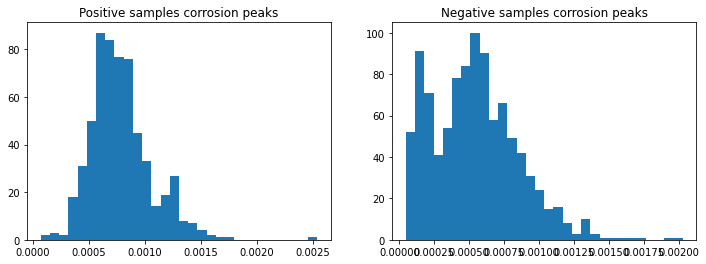

In [9]:
positive_peaks = np.max(corrosion_data_positive[:, 6:], axis=1)
negative_peaks = np.max(corrosion_data_negative[:, 6:], axis=1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))

ax1.hist(positive_peaks, bins=30)
ax1.set_title("Positive samples corrosion peaks")

ax2.hist(negative_peaks, bins=30)
ax2.set_title("Negative samples corrosion peaks")

In [10]:
# Examine some samples with abnormally high corrosion depths

print ("%10s %10s %10s" % ("max_depth", "simulation", "timestep"))
# filter to max_depth > 1
high_max_depth = [x for x in list(zip(negative_peaks, corrosion_data_negative[:, 0], corrosion_data_negative[:, 1])) if x[0] > 1]
# sort by simulation_idx and timestep
high_max_depth.sort(key=lambda x: (x[1], x[2]))
for x in high_max_depth:
  print ("%10f %10d %10d" % (x[0], x[1], x[2]))

 max_depth simulation   timestep


Text(0.5, 1.0, 'Negative samples corrosion mean')

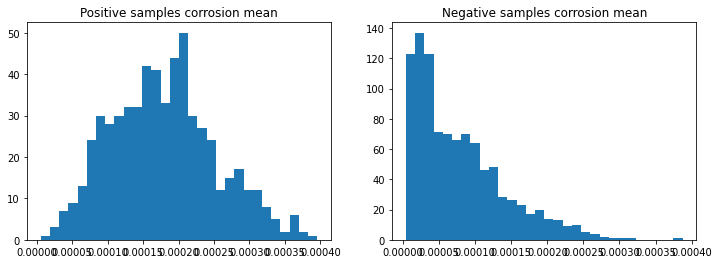

In [11]:
# Mean corrosion depths
positive_mean = np.mean(corrosion_data_positive[:, 6:], axis=1)
negative_mean = np.mean(corrosion_data_negative[:, 6:], axis=1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4))

ax1.hist(positive_mean, bins=30)
ax1.set_title("Positive samples corrosion mean")

ax2.hist(negative_mean, bins=30)
ax2.set_title("Negative samples corrosion mean")

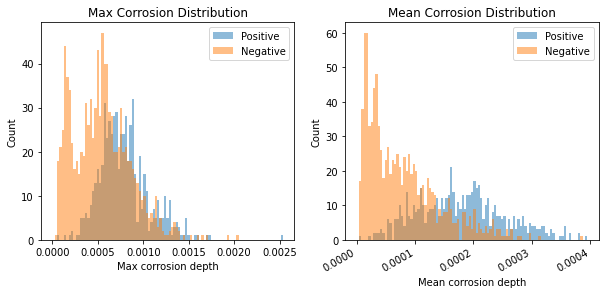

In [12]:
# Combine the above
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))

bins = np.linspace(0, max(list(positive_peaks) + list(negative_peaks)), 100)

ax1.hist(positive_peaks, bins, alpha=0.5, label="Positive")

ax1.hist(negative_peaks, bins, alpha=0.5, label="Negative")
ax1.set_title("Max Corrosion Distribution")

ax1.set_xlabel("Max corrosion depth")
ax1.set_ylabel("Count")

ax1.legend()

bins = np.linspace(0, max(list(positive_mean) + list(negative_mean)), 100)

ax2.hist(positive_mean, bins, alpha=0.5, label="Positive")

ax2.hist(negative_mean, bins, alpha=0.5, label="Negative")
ax2.set_title("Mean Corrosion Distribution")

ax2.set_xlabel("Mean corrosion depth")
ax2.set_ylabel("Count")

plt.setp(ax2.get_xticklabels(), rotation=30, horizontalalignment='right')

plt.legend()

# Concrete Property Distributions

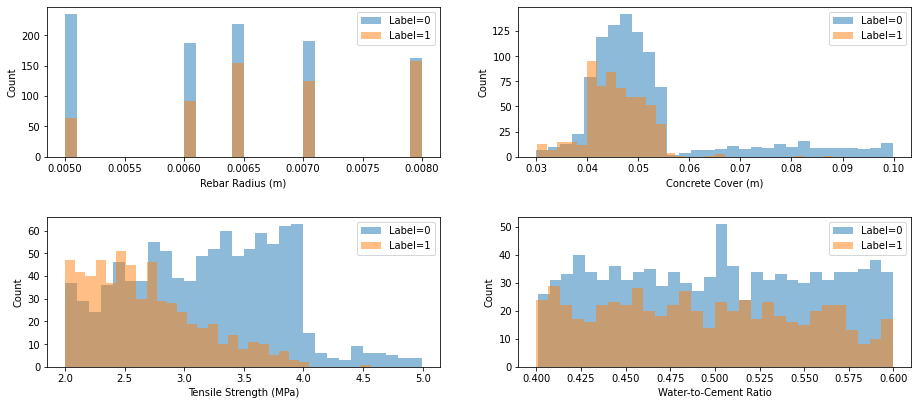

In [13]:
fig, axs = plt.subplots(2, 2, figsize=(12, 5))
axs[0, 0].hist(corrosion_data_negative[:, 2], bins=30, alpha=0.5, label="Label=0")
axs[0, 0].hist(corrosion_data_positive[:, 2], bins=30, alpha=0.5, label="Label=1")
axs[0, 0].set_xlabel('Rebar Radius (m)')
axs[0, 0].set_ylabel("Count")
axs[0, 0].legend()
axs[0, 1].hist(corrosion_data_negative[:, 3], bins=30, alpha=0.5, label="Label=0")
axs[0, 1].hist(corrosion_data_positive[:, 3], bins=30, alpha=0.5, label="Label=1")
axs[0, 1].set_xlabel('Concrete Cover (m)')
axs[0, 1].set_ylabel("Count")
axs[0, 1].legend()
axs[1, 0].hist(corrosion_data_negative[:, 4], bins=30, alpha=0.5, label="Label=0")
axs[1, 0].hist(corrosion_data_positive[:, 4], bins=30, alpha=0.5, label="Label=1")
axs[1, 0].set_xlabel('Tensile Strength (MPa)')
axs[1, 0].set_ylabel("Count")
axs[1, 0].legend()
axs[1, 1].hist(corrosion_data_negative[:, 5], bins=30, alpha=0.5, label="Label=0")
axs[1, 1].hist(corrosion_data_positive[:, 5], bins=30, alpha=0.5, label="Label=1")
axs[1, 1].set_xlabel('Water-to-Cement Ratio')
axs[1, 1].set_ylabel("Count")

# set the spacing between subplots
plt.subplots_adjust(left=0,
                    bottom=0,
                    right=1,
                    top=1,
                    wspace=0.2,
                    hspace=.4)

axs[1, 1].legend()

# Unlabeled Data Analysis

In [14]:
# load unlabeled dataset
unlabeled_data = np.load('/content/drive/MyDrive/CS230/corrosion_unlabeled.npy', allow_pickle=True)
print("unlabeled_data shape: ", unlabeled_data.shape)

unlabeled_data shape:  (84834, 337)


Text(0.5, 1.0, 'Unlabeled samples corrosion peaks')

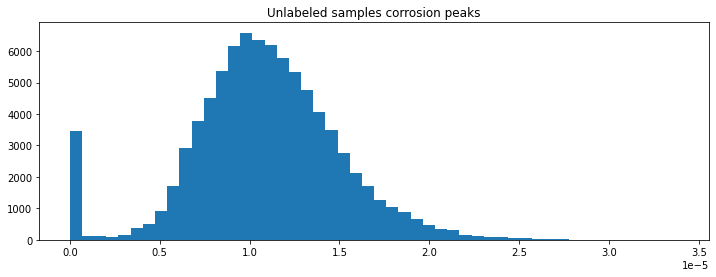

In [15]:
unlabeled_peaks = np.max(unlabeled_data[:], axis=1)

fig, (ax1) = plt.subplots(1, 1, figsize=(12,4))

ax1.hist(unlabeled_peaks, bins=50)
ax1.set_title("Unlabeled samples corrosion peaks")

In [16]:
print("Mean unlabeled peak: %.6f" % np.mean(unlabeled_peaks))
print("Mean positive peak:  %.6f" % np.mean(positive_peaks))
print("Mean negative peak:  %.6f" % np.mean(negative_peaks))

Mean unlabeled peak: 0.000011
Mean positive peak:  0.000787
Mean negative peak:  0.000543


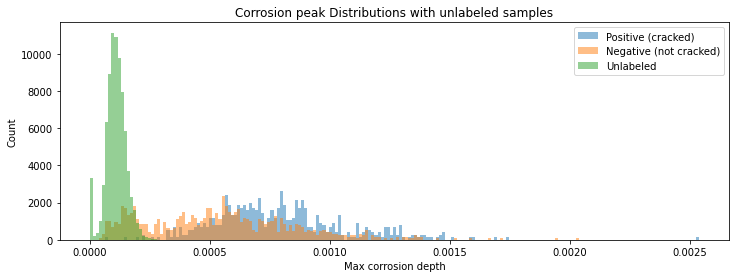

In [17]:
# Plot peak distribution histograms
fig, ax = plt.subplots(figsize=(12,4))

bins = np.linspace(0, max(list(positive_peaks) + list(negative_peaks)), 200)

ax.hist(positive_peaks, bins, alpha=0.5, label="Positive (cracked)", density=True)
ax.hist(negative_peaks, bins, alpha=0.5, label="Negative (not cracked)", density=True)
ax.hist(unlabeled_peaks*10, bins, alpha=0.5, label="Unlabeled", density=True)

ax.set_title("Corrosion peak Distributions with unlabeled samples")

ax.set_xlabel("Max corrosion depth")
ax.set_ylabel("Count")

plt.legend()